In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/karth/Downloads/Buyogo_assignment/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.shape

(119390, 32)

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# 1.Data Collection & Preprocessing 

In [6]:
df['children'].fillna(0, inplace=True) # Assumed missing children count is 0
df['country'].fillna('Unknown', inplace=True)  # Replace missing country with 'Unknown'
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

C:\Users\karth\AppData\Local\Temp\ipykernel_14340\505883740.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True) # Assumed missing children count is 0
C:\Users\karth\AppData\Local\Temp\ipykernel_14340\505883740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [7]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
# Converting 'reservation_status_date' to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

C:\Users\karth\AppData\Local\Temp\ipykernel_14340\1077427376.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


# 2. Analytics & Reporting 

###  Implementing the following analytics: 

- Revenue trends over time. 
- Cancellation rate as percentage of total bookings 
- Geographical distribution of users doing the bookings. 
- Booking Lead time distribution. 
- Additional Analytics if any 

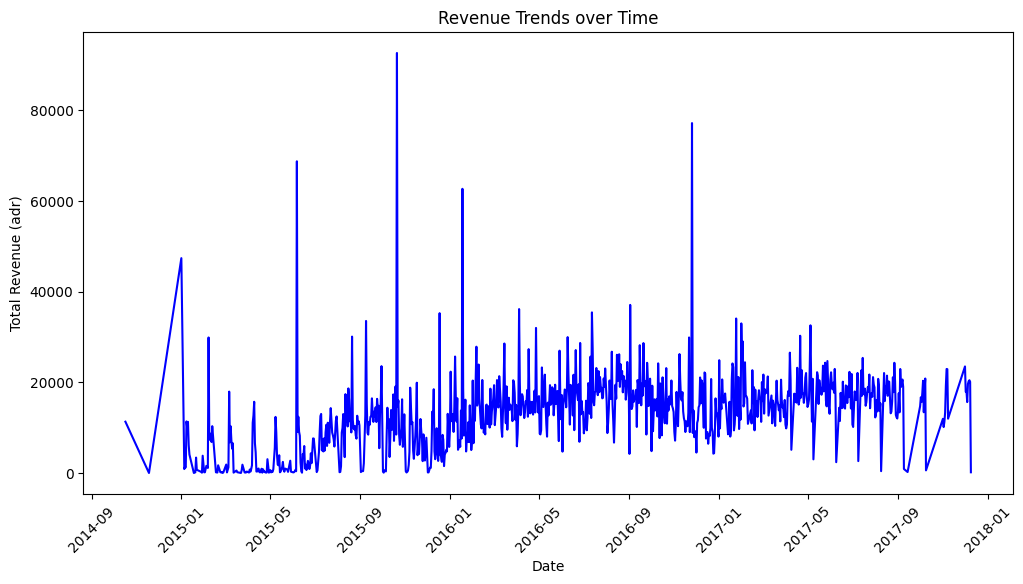

In [9]:
# 1. Revenue Trends Over Time, adr (Average Daily Rate)

df_revenue = df.groupby('reservation_status_date')['adr'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_revenue, x='reservation_status_date', y='adr', color='b')
plt.xlabel('Date')
plt.ylabel('Total Revenue (adr)')
plt.title("Revenue Trends over Time")
plt.xticks(rotation=45)
plt.show()

- The revenue trend over time shows variations in total ADR (Average Daily Rate), indicating seasonal fluctuations or trends in bookings.

- Next, I'll calculate the cancellation rate as a percentage of total bookings. ​​


In [10]:
# 2. Cancellation Rate Calculation

total_booking = len(df)
canceled_booking = df['is_canceled'].sum()
cancellation_rate = (canceled_booking/total_booking)*100
print(f"Cancellation rate: {cancellation_rate:.2f}%")

Cancellation rate: 37.04%


- The cancellation rate is approximately 37.04%, meaning more than one-third of the bookings were canceled.

C:\Users\karth\AppData\Local\Temp\ipykernel_14340\523921586.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


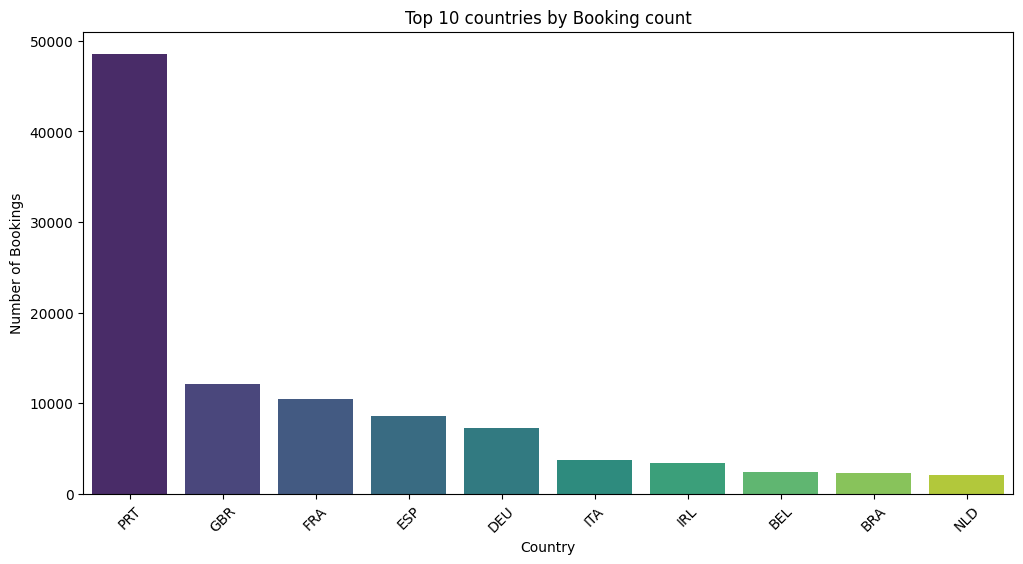

In [11]:
# 3. Geographical Distribution of Bookings

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title("Top 10 countries by Booking count")
plt.xticks(rotation=45)
plt.show()

- The bar chart displays the top 10 countries with the highest number of bookings. The majority of bookings come from a few key countries, with some significant disparities.

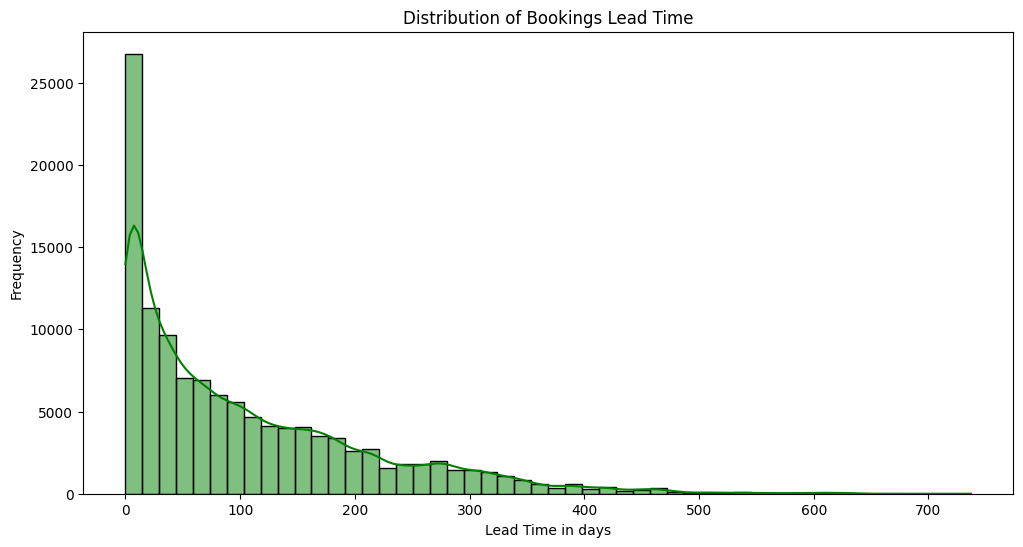

In [12]:
# 4. Booking Lead Time Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['lead_time'], bins=50, kde=True, color='g')
plt.xlabel('Lead Time in days')
plt.ylabel('Frequency')
plt.title("Distribution of Bookings Lead Time")
plt.show()

- The histogram shows the distribution of booking lead time (days between booking and check-in). Most bookings occur within a shorter lead time.

# Aditional Insights

C:\Users\karth\AppData\Local\Temp\ipykernel_14340\2546367464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['arrival_date_month'], order=[


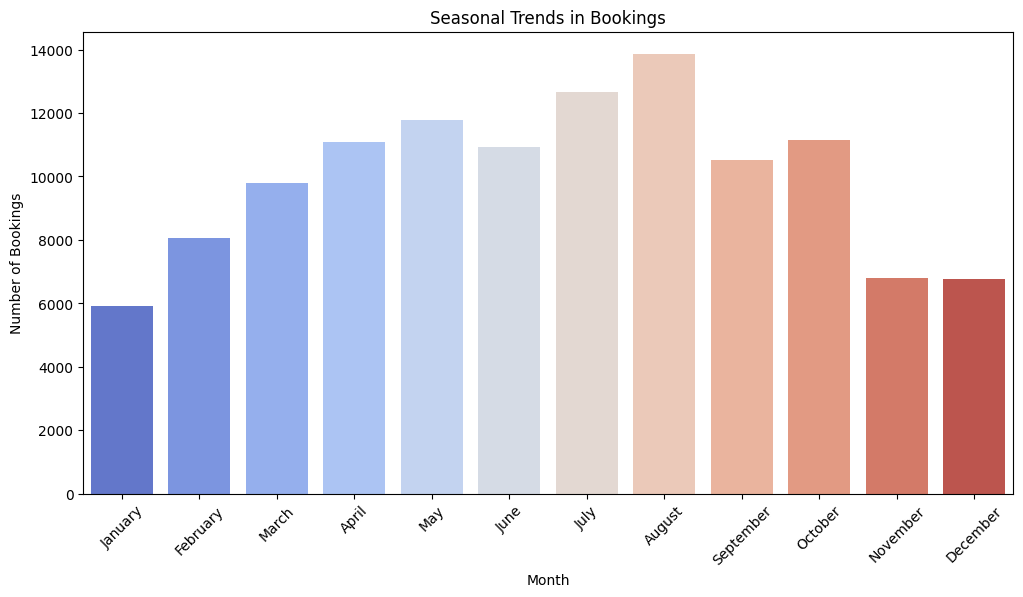

In [13]:
# 5. Seasonal Trends in Bookings
plt.figure(figsize=(12, 6))
sns.countplot(x=df['arrival_date_month'], order=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Seasonal Trends in Bookings")
plt.xticks(rotation=45)
plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_14340\3218886693.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['customer_type'], palette="pastel")


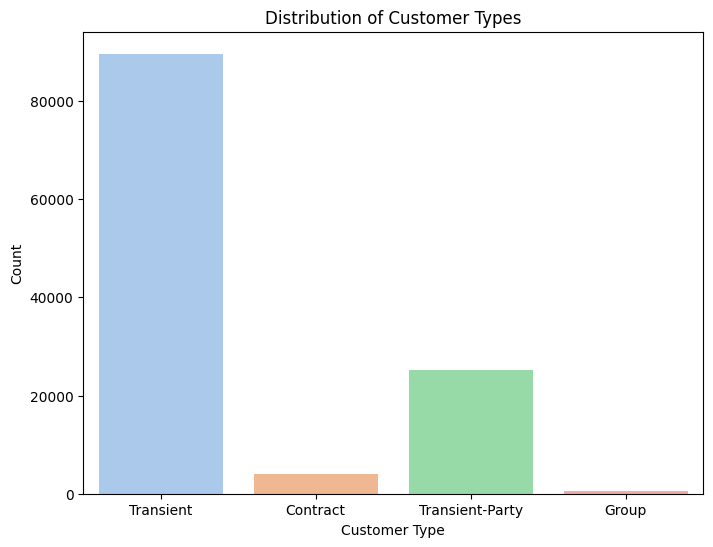

In [14]:
# 6. Customer Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df['customer_type'], palette="pastel")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.title("Distribution of Customer Types")
plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_14340\2293183765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['deposit_type'], y=df['is_canceled'], estimator=np.mean, palette="muted")


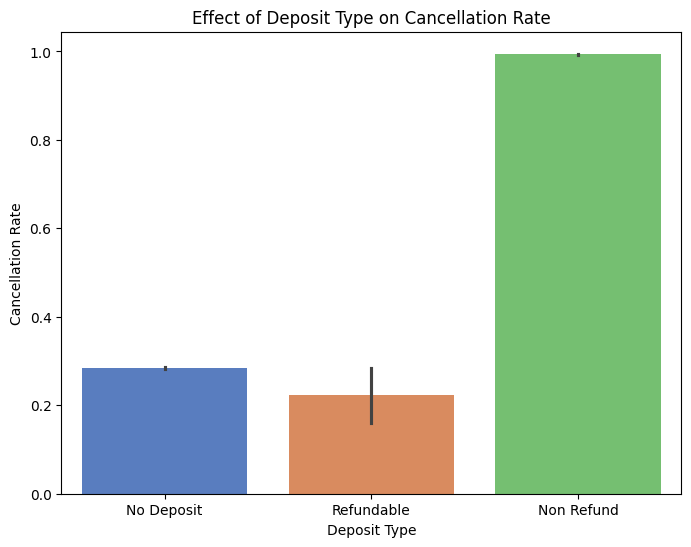

In [15]:
# 7. Effect of Deposit Type on Cancellations
plt.figure(figsize=(8, 6))
sns.barplot(x=df['deposit_type'], y=df['is_canceled'], estimator=np.mean, palette="muted")
plt.xlabel("Deposit Type")
plt.ylabel("Cancellation Rate")
plt.title("Effect of Deposit Type on Cancellation Rate")
plt.show()

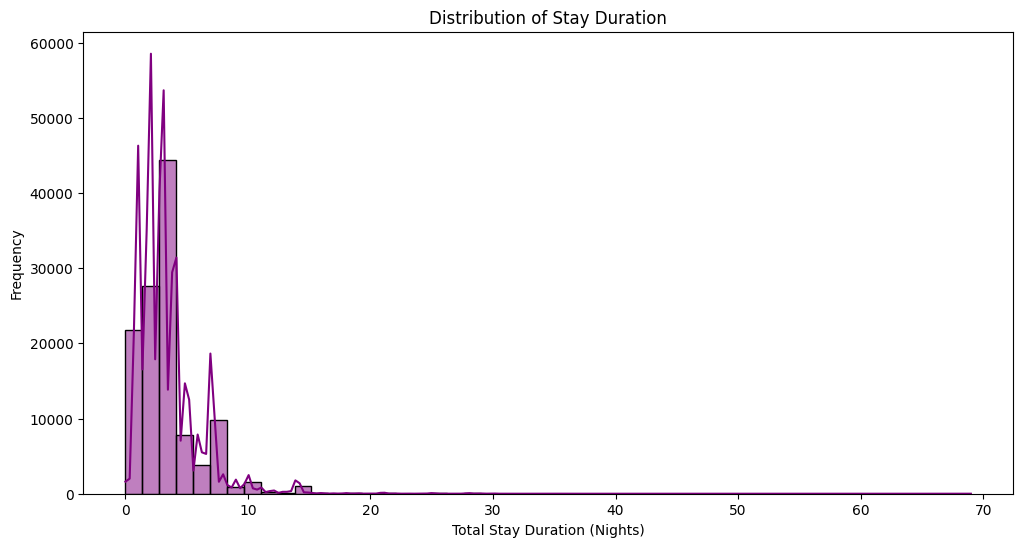

In [16]:
# 8. Stay Duration Analysis
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
plt.figure(figsize=(12, 6))
sns.histplot(df['total_stay'], bins=50, kde=True, color='purple')
plt.xlabel("Total Stay Duration (Nights)")
plt.ylabel("Frequency")
plt.title("Distribution of Stay Duration")
plt.show()

# Insights from Additional Analysis:

5. Seasonal Trends in Bookings:

- Peak bookings occur in summer months (June–August).
- Lowest bookings in winter months (November–February).

6. Customer Type Distribution:

- Majority are Transient customers (one-time visitors).
- Contract and Group bookings are much lower.

7. Effect of Deposit Type on Cancellations:

- No Deposit customers cancel the most.
- Non-Refundable deposits reduce cancellations significantly.

8. Stay Duration Analysis:

- Most stays are short (1–5 nights).
- Very few extended stays beyond 10 nights

C:\Users\karth\AppData\Local\Temp\ipykernel_14340\1713169395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='stays_in_weekend_nights', data=df, palette="coolwarm")


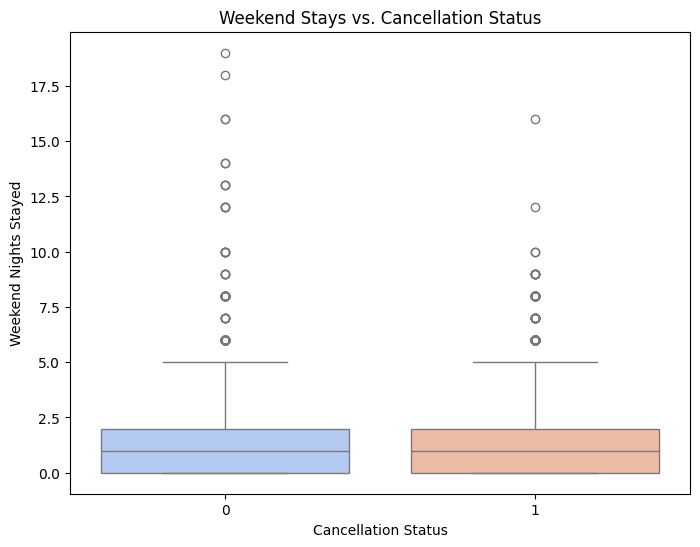

In [17]:
# 9. Weekday vs. Weekend Booking Preferences
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_canceled', y='stays_in_weekend_nights', data=df, palette="coolwarm")
plt.xlabel("Cancellation Status")
plt.ylabel("Weekend Nights Stayed")
plt.title("Weekend Stays vs. Cancellation Status")
plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_14340\3092030681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['assigned_room_type'], order=df['assigned_room_type'].value_counts().index, palette="magma")


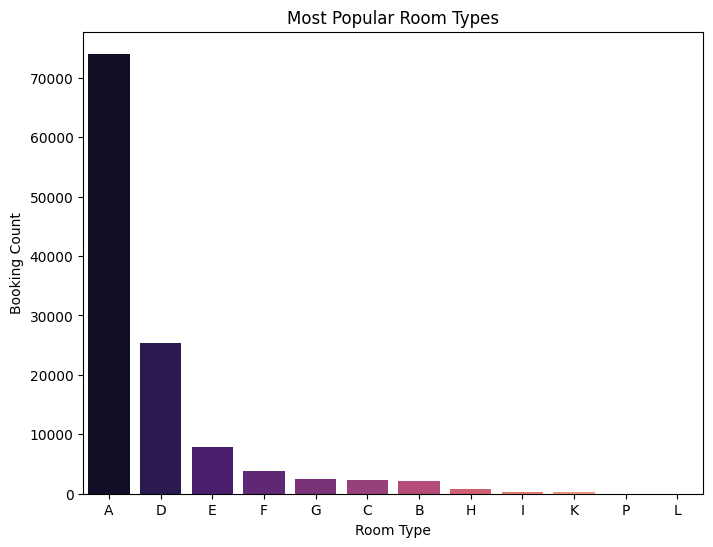

In [18]:
# 10. Most Popular Room Type by Booking Volume
plt.figure(figsize=(8, 6))
sns.countplot(x=df['assigned_room_type'], order=df['assigned_room_type'].value_counts().index, palette="magma")
plt.xlabel("Room Type")
plt.ylabel("Booking Count")
plt.title("Most Popular Room Types")
plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_14340\506891931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='total_of_special_requests', data=df, palette="Set2")


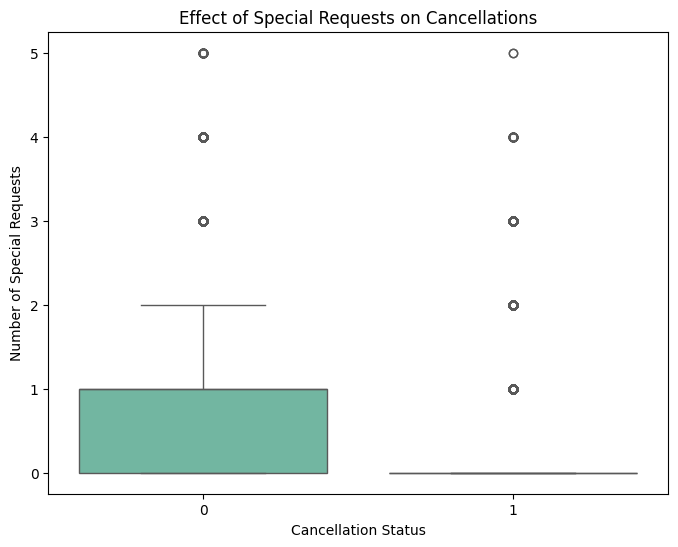

In [19]:
# 11. Impact of Special Requests on Cancellations
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_canceled', y='total_of_special_requests', data=df, palette="Set2")
plt.xlabel("Cancellation Status")
plt.ylabel("Number of Special Requests")
plt.title("Effect of Special Requests on Cancellations")
plt.show()

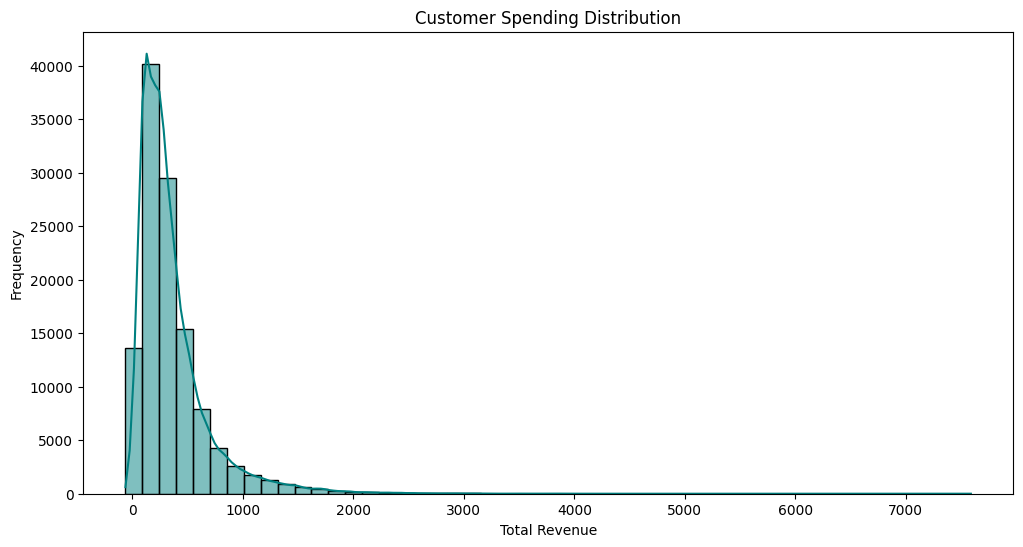

In [20]:
# 12. Customer Segmentation Based on Spending Behavior
df['total_revenue'] = df['adr'] * df['total_stay']
plt.figure(figsize=(12, 6))
sns.histplot(df['total_revenue'], bins=50, kde=True, color='teal')
plt.xlabel("Total Revenue")
plt.ylabel("Frequency")
plt.title("Customer Spending Distribution")
plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_14340\796553171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['market_segment'], order=df['market_segment'].value_counts().index, palette="Blues")


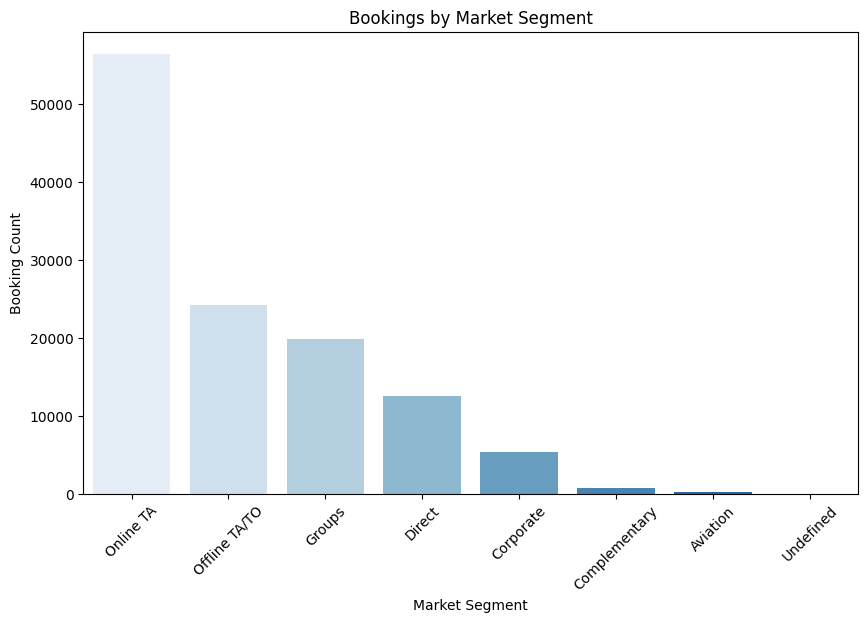

In [21]:
# 13. Booking Trends by Market Segment
plt.figure(figsize=(10, 6))
sns.countplot(x=df['market_segment'], order=df['market_segment'].value_counts().index, palette="Blues")
plt.xlabel("Market Segment")
plt.ylabel("Booking Count")
plt.title("Bookings by Market Segment")
plt.xticks(rotation=45)
plt.show()